# Vizualizing ModelNet40 Models
The ModelNet40 dataset has been downloaded and stored in the data center on ROSIE: "/data/csc4801/KedzioraLab/ModelNet40".

To ensure we understand the data that the dataset contains, we should try visualizing a few of the models.

## Necessary Installs

In [1]:
# !pip install ipympl 

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

%matplotlib widget

## Example of drawing triangular suraces
Example from : https://stackoverflow.com/questions/63601155/how-to-plot-a-triangular-3d-mesh

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  """


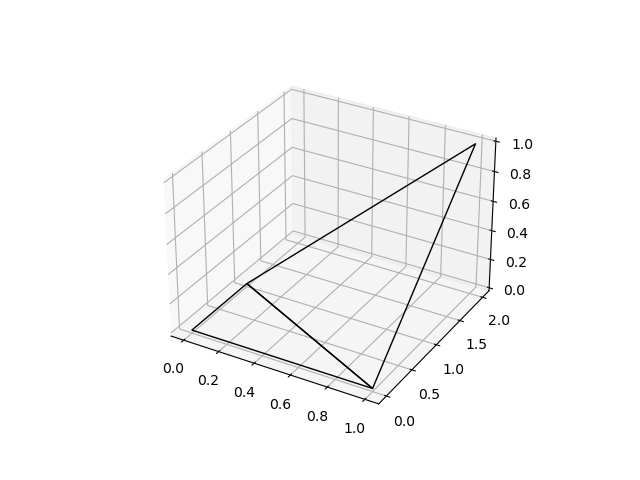

In [8]:
vertices = np.array([[0,0,0],[1,0,0],[0,1,0],[1,2,1]])
T = np.array([[0,1,2], [1,2,3]])

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(vertices[:,0], vertices[:,1], vertices[:,2], triangles = T, edgecolor=[[0,0,0]], linewidth=1.0, alpha=0.0, shade=False)

plt.show()

## Reading OFF files

In [18]:
def read_off(filename):
    """Reads an OFF file.

    Args:
    filename: The name of the OFF file.

    Returns:
    A tuple of (vertices, faces).
    """

    with open(filename, "r") as f:
        header = f.readline().strip()
        if header != "OFF":
            raise ValueError("Invalid OFF file")

        num_vertices, num_faces, num_edges = map(int, f.readline().split())

        vertices = []
        for i in range(num_vertices):
            vertices.append(list(map(float, f.readline().split())))
        vertices = np.array(vertices)
        
        faces = []
        for i in range(num_faces):
            faces.append(list(map(int, f.readline().split()[1:])))
        faces = np.array(faces)
        
#         vertices = np.fromfile(f, dtype=np.float32, count=3 * num_vertices)
#         vertices = vertices.reshape((num_vertices, 3))

#         faces = np.fromfile(f, dtype=int, count=3 * num_faces)
#         faces = faces.reshape((num_faces, 3))

    return vertices, faces

# Grab and Read the Model

In [20]:
filename = "/data/csc4801/KedzioraLab/ModelNet40/airplane/train/airplane_0002.off"
vertices, faces = read_off(filename)
print(vertices)
print(faces)

[[845.209  645.057   92.1002]
 [867.567  644.62    93.2404]
 [822.848  645.501   91.0266]
 ...
 [388.471  699.63    42.8754]
 [388.471  699.998   42.8754]
 [388.471  699.998   42.8754]]
[[  155   156   157]
 [  156   155   158]
 [  163   155   157]
 ...
 [94319 94329 94334]
 [94332 94329 94330]
 [94329 94332 94334]]


In [21]:
len(vertices)

94335

## Draw the Model

In [22]:
skip_faces = 10 # how many faces to skip? Improve performance

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  


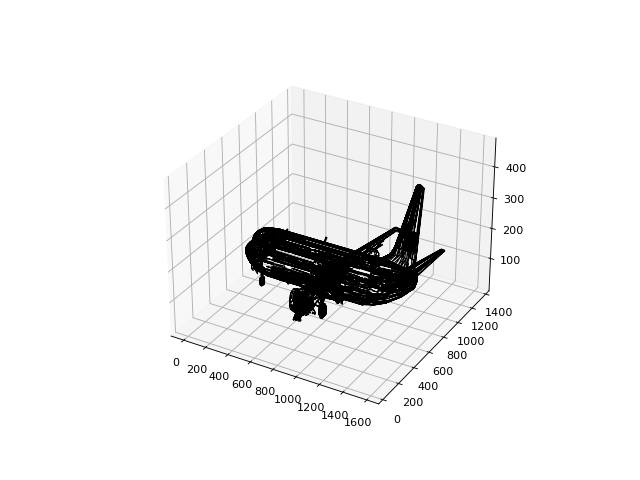

In [24]:
fig = plt.figure(figsize=(8, 6), dpi=80)
ax = fig.gca(projection='3d')
ax.plot_trisurf(vertices[:,0], vertices[:,1], vertices[:,2], triangles = faces[::skip_faces], edgecolor=[[0,0,0]], linewidth=1.0, alpha=0.0, shade=False)

plt.show()

In [ ]:
filename = "/data/csc4801/KedzioraLab/ModelNet40/airplane/train/airplane_0002.off"
vertices, faces = read_off(filename)
print(vertices)
print(faces)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  


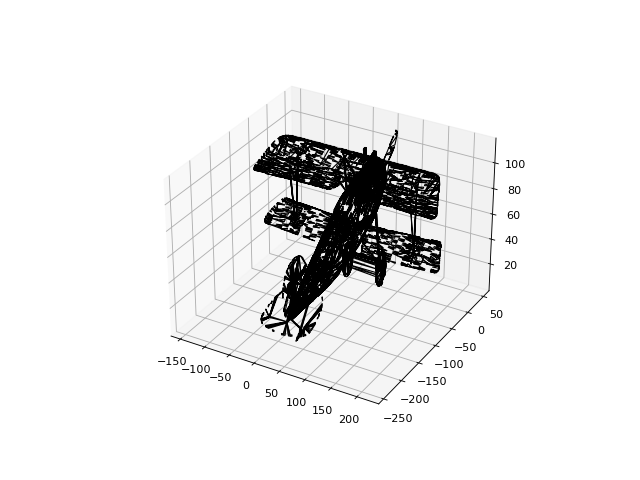

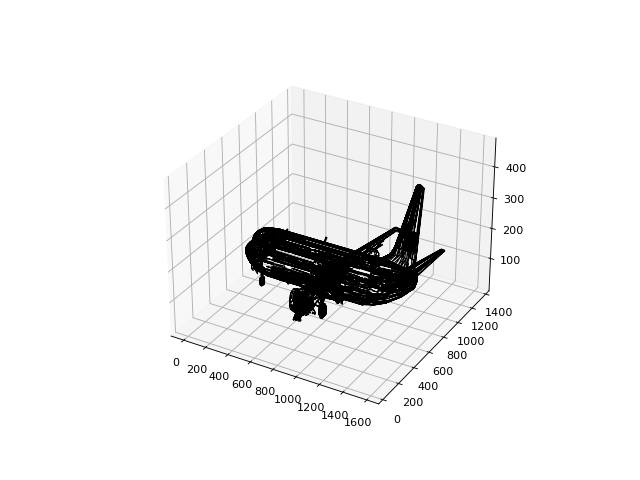

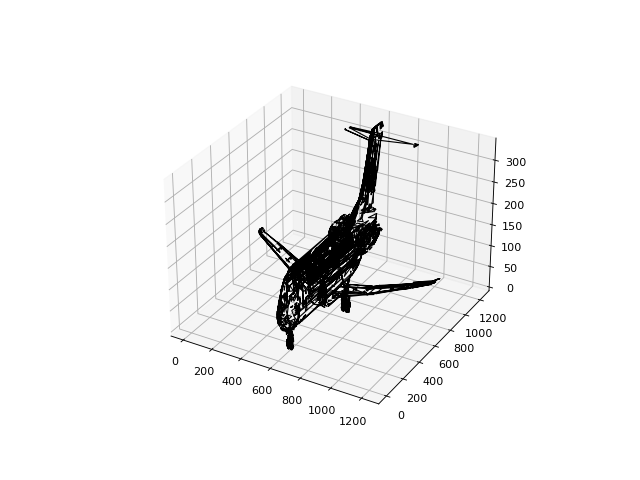

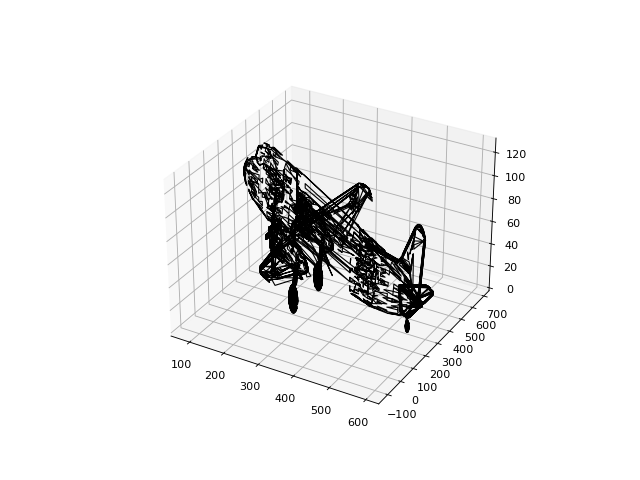

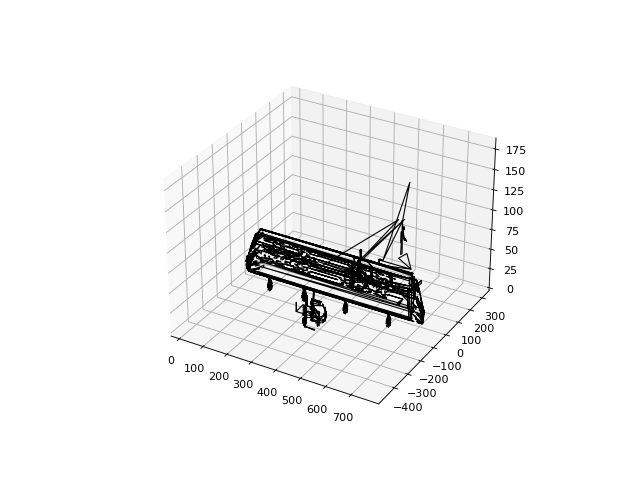

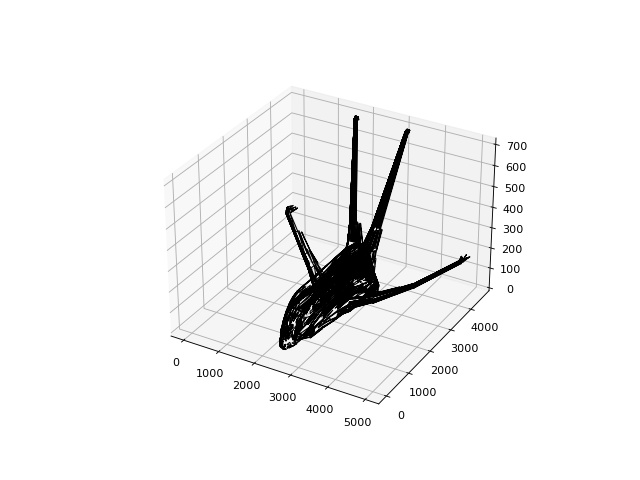

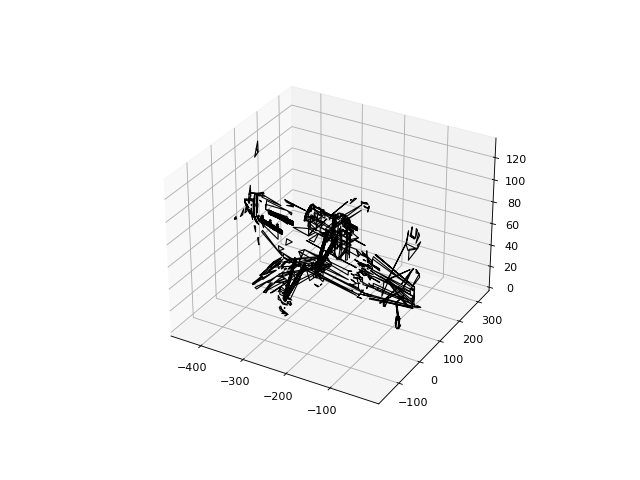

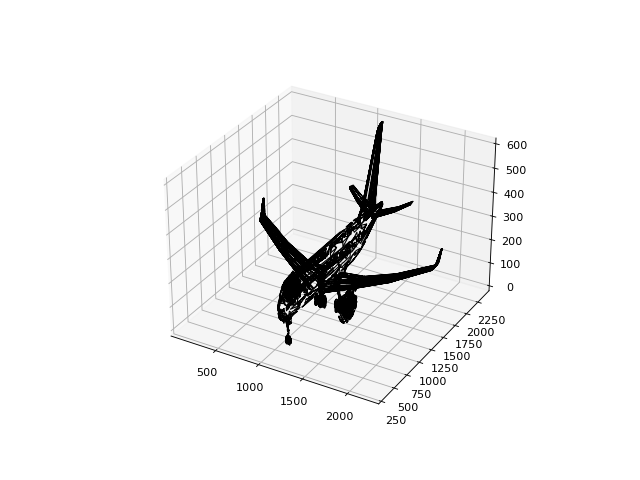

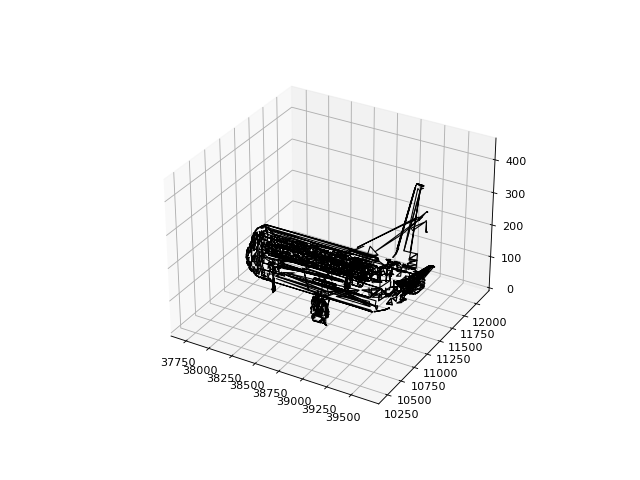

In [29]:
for i in range(1,10):
    filename = f"/data/csc4801/KedzioraLab/ModelNet40/airplane/train/airplane_{i:04d}.off"
    vertices, faces = read_off(filename)

    fig = plt.figure(figsize=(8, 6), dpi=80)
    ax = fig.gca(projection='3d')
    ax.plot_trisurf(vertices[:,0], vertices[:,1], vertices[:,2], triangles = faces[::skip_faces], edgecolor=[[0,0,0]], linewidth=1.0, alpha=0.0, shade=False)

    plt.show()